# 多層パーセプトロン

In [5]:
from sklearn.datasets import make_blobs
X_raw, y_raw = make_blobs(n_samples = 100, centers=2, cluster_std=5.2, random_state=42)

In [6]:
import numpy as np
X = X_raw.astype(np.float32)

In [7]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False, dtype=np.float32)
y = enc.fit_transform(y_raw.reshape(-1, 1))

In [8]:
import cv2
mlp = cv2.ml.ANN_MLP_create()

In [9]:
n_input = 2
n_hidden = 8
n_output = 2
mlp.setLayerSizes(np.array([n_input, n_hidden, n_output]))

MLP分類器のカスタマイズ\
・mlp.setActivationFunction:ネットワーク内全てのニューロンにおける活性化関数を定義\
・mlp.setTrainMethod:学習方法を定義\
・mlp.setTermCriteria:学習フェーズの終了条件を設定\
・cv2.ANN_MLP_IDENTITY:線形活性化関数\
・cv2.ANN_MLP_SIGMOID_SYM:対称シグモイド関数(双曲線正接関数)\
・cv2.ANN_GAUSSIAN:ガウス関数

In [10]:
mlp.setActivationFunction(cv2.ml.ANN_MLP_SIGMOID_SYM, 2.5, 1.0)

In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Text(0, 0.5, 'y')

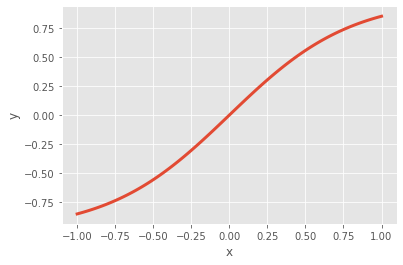

In [12]:
alpha = 2.5
beta = 1.0
x_sig = np.linspace(-1.0, 1.0, 100)
y_sig = beta * (1.0 - np.exp(-alpha * x_sig))
y_sig /= (1 + np.exp(-alpha * x_sig))
plt.plot(x_sig, y_sig, linewidth=3)
plt.xlabel('x')
plt.ylabel('y')

学習方法の設定\
・cv2.ml.ANN_MLP_BAKPROP:バックプロぱゲーションのアルゴリズム\
  mlp.setBackpropMomentumScale、mlp.setCackpropWightScaleメソッドを用いて追加のスケーリング係数を設定可能\
・cv2.ml.ANN_MLP_PROP:Rpropアルゴリズム\
  mlp.setRpopDW0、mlp.setRpropDWMax、mlp.setRpropDWMin、mlp.setRpropDWMinus、mlp.setRpropDWPlusメソッドで追加パラメータを設定可能

In [13]:
mlp.setTrainMethod(cv2.ml.ANN_MLP_BACKPROP)

In [17]:
term_mode = cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS
term_max_iter = 300
term_eps = 0.01
mlp.setTermCriteria((term_mode, term_max_iter, term_eps))

In [18]:
mlp.train(X, cv2.ml.ROW_SAMPLE, y)

True

In [19]:
_, y_hat = mlp.predict(X)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_hat.round(), y)

0.84

In [34]:
def plot_decision_boundary(classifier, X_test, y_test):
    h = 0.02
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                      np.arange(y_min, y_max, h))
    X_hypo = np.c_[xx.ravel().astype(np.float32), 
                   yy.ravel().astype(np.float32)]
    _, zz = classifier.predict(X_hypo)
    zz = np.argmax(zz, axis=1)
    zz = zz.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=200)

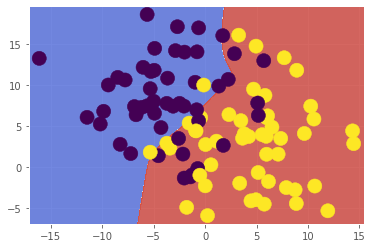

In [36]:
plot_decision_boundary(mlp, X, y_raw)